<a href="https://colab.research.google.com/github/AyA-EhaB/FEDIS_Tasks/blob/main/logistic_regression_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay


# Prepare Dataset

In [ ]:
iris = load_iris()


In [ ]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
X.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
from tensorflow.keras.utils import to_categorical

y_encoded = to_categorical(y, num_classes=3)


In [ ]:
n_features = X_scaled.shape[1]   # 4 features
n_classes = 3                    # 3 flower types

# Small random weights and bias
W = np.random.randn(n_features, n_classes) * 0.01
b = np.zeros((1, n_classes))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size =0.2,random_state=5)

### SoftMax
Softmax is just a way to convert numbers (logits) into probabilities.

If you have raw scores for each class (can be negative, big, small), softmax makes them:
All positive

Add up to 1
So we can say: “The probability this flower is Setosa is 0.7, Versicolor 0.2, Virginica 0.1”.

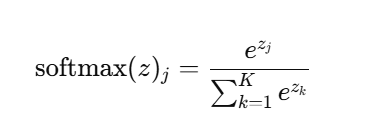
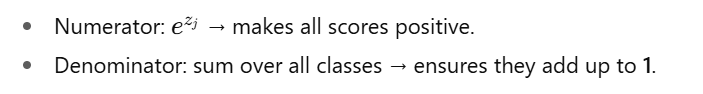


## Why subtract the max?

Exponentials can blow up (overflow).

Trick: subtract the largest number so the biggest becomes 0.

Since softmax is unaffected if we add or subtract the same value, this keeps numbers safe without changing results.

In [ ]:
def softMax (z):
  exp_z = np.exp(z - np.max(z, axis = 1,keepdims = True))
  return exp_z / np.sum(exp_z, axis = 1, keepdims = True)

### Cross_Entropy
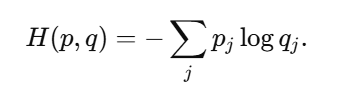

In [ ]:
def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), np.argmax(y_true, axis=1)])
    return np.sum(log_likelihood) / m


In [ ]:
y.shape

(150,)

In [ ]:
X.shape

(150, 4)

In [ ]:

# 3. Model Setup
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 classes

# Compile model with softmax + crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 4. Train
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2)



Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3153 - loss: 3.1731 - val_accuracy: 0.2500 - val_loss: 2.5959
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3158 - loss: 2.6811 - val_accuracy: 0.2500 - val_loss: 2.3918
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3895 - loss: 2.4639 - val_accuracy: 0.2500 - val_loss: 2.2224
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4244 - loss: 2.0909 - val_accuracy: 0.2500 - val_loss: 2.0749
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3224 - loss: 2.2180 - val_accuracy: 0.2500 - val_loss: 1.9396
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3431 - loss: 2.0387 - val_accuracy: 0.2500 - val_loss: 1.8167
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3310 - loss: 1.8605 - val_accuracy: 0.2500 - val_loss: 1.7078
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3386 - loss: 1.8269 - val_accuracy: 0.2500 - val_loss: 1.6133


In [ ]:
# 5. Evaluate
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=iris.target_names))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8667 - loss: 0.5169
Test Accuracy: 0.8666666746139526
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      0.64      0.78        11
   virginica       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.88      0.87        30
weighted avg       0.90      0.87      0.86        30



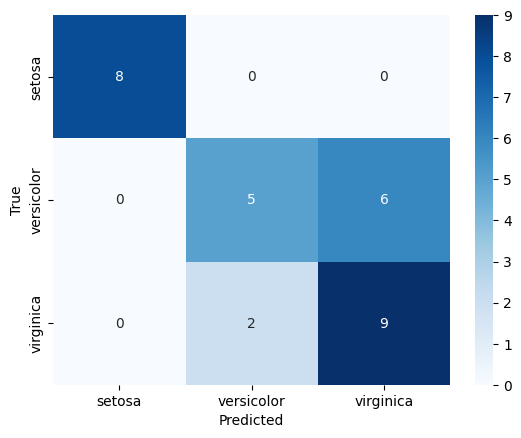

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()